#### 1. Przygotowanie potrzebnych bibliotek.

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

import requests
from PIL import Image, ImageOps

print(tf.__version__)

2.12.0


#### 2. Załadowanie zbioru danych Fashion MNIST z biblioteki Keras.

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### 3. Dopasowanie nazw klas do etykiet.

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### 4. Eksploracja zbioru danych.

a) Zbiór treningowy.

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
len(train_labels)

60000

In [11]:
train_images.shape

(60000, 28, 28)

b) Zbiór testowy.

In [13]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [14]:
len(test_labels)

10000

In [15]:
test_images.shape

(10000, 28, 28)

#### 5. Przygotowanie zbioru danych.

a) Normalizacja wartości pikseli z zakresu 0-255 do 0-1.

In [18]:
train_images = train_images / 255.0

test_images = test_images / 255.0

b) Rozszerzenie wymiarów (dodanie kanału głębokości dla CNN).

In [20]:
train_images = train_images.reshape(-1, 28, 28, 1)

test_images = test_images.reshape(-1, 28, 28, 1)

c) Weryfikacja zmian.

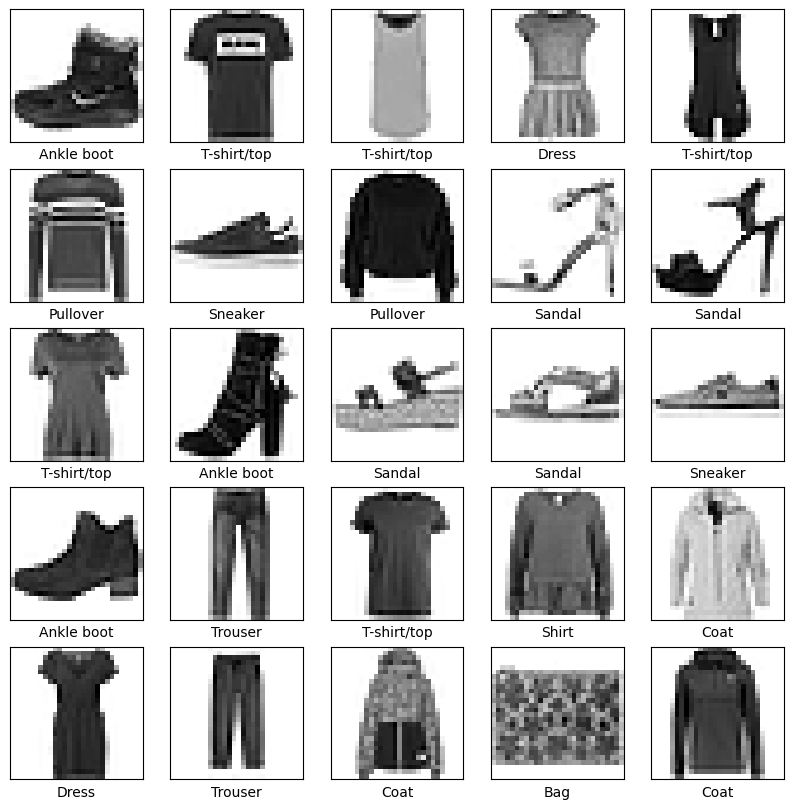

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### 6. Zdefiniowanie architektury modelu CNN.

In [24]:
model = tf.keras.Sequential([
    # Warstwa konwolucyjna 1
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    # Warstwa konwolucyjna 2
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    # Spłaszczenie
    tf.keras.layers.Flatten(),

    # Warstwa w pełni połączona
    tf.keras.layers.Dense(128, activation='relu'),

    # Warstwa wyjściowa
    tf.keras.layers.Dense(10, activation='softmax')    # 10 klas, softmax do klasyfikacji wieloklasowej
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

#### 7. Kompilacja modelu.

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### 8. Trenowanie modelu.

Domyślnie ustawiona liczba epok to 10, natomiast przy 20 osiagnięto bardzo wysoka skuteczność:

```loss: 0.0387 - accuracy: 0.9856 - val_loss: 0.4890 - val_accuracy: 0.9109```

In [30]:
num_of_epochs = 10

In [31]:
history = model.fit(train_images, train_labels, epochs=num_of_epochs, validation_data=(test_images, test_labels))

Epoch 1/10
   1/1875 [..............................] - ETA: 4:43 - loss: 2.3246 - accuracy: 0.0312

2025-02-24 17:34:56.915200: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 9s 5ms/step - loss: 0.4451 - accuracy: 0.8384 - val_loss: 0.3493 - val_accuracy: 0.8739
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2962 - accuracy: 0.8910 - val_loss: 0.3059 - val_accuracy: 0.8888
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2507 - accuracy: 0.9072 - val_loss: 0.2779 - val_accuracy: 0.8963
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2187 - accuracy: 0.9187 - val_loss: 0.2579 - val_accuracy: 0.9047
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1928 - accuracy: 0.9280 - val_loss: 0.2530 - val_accuracy: 0.9076
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1708 - accuracy: 0.9358 - val_loss: 0.2647 - val_accuracy: 0.9074
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1512 - accuracy: 0.9433 - val_loss: 0.2592 - val_accuracy: 0.9135
Epo

#### 9. Ewaluacja dokładności modelu na zbiorze testowym.

In [33]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(f'\nDokładność na zbiorze testowym: {test_acc:.4f}')

313/313 - 1s - loss: 0.3124 - accuracy: 0.9053 - 519ms/epoch - 2ms/step

Dokładność na zbiorze testowym: 0.9053


Otrzymane wartości dokładności przy 20 epokach:

```313/313 - 1s - loss: 0.4890 - accuracy: 0.9109 - 627ms/epoch - 2ms/step```

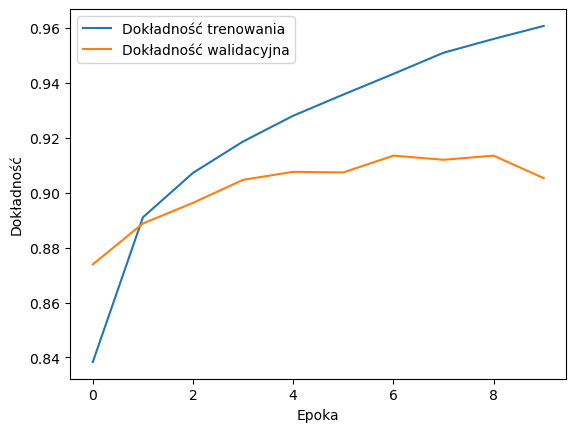

In [35]:
plt.plot(history.history['accuracy'], label='Dokładność trenowania')
plt.plot(history.history['val_accuracy'], label='Dokładność walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.show()

Liczba epok nie wpływa znaczaco na dokładność walidacyjna (od ok. 5 epoki jest to przedział 0.90 - 0.92), natomiast dokładność trenowania wzrasta.

#### 10. Predykcja i przykładowe wyniki.

a) Przygotowanie predykcji.

In [39]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [40]:
predictions[0]

array([3.9708987e-09, 3.1640536e-07, 7.8812586e-13, 1.6122095e-10,
       5.0893308e-16, 1.1816921e-04, 3.5251926e-14, 5.6426393e-07,
       2.3101653e-12, 9.9988091e-01], dtype=float32)

In [41]:
np.argmax(predictions[0])

9

In [42]:
test_labels[0]

9

b) Funkcje do wyświetlania obrazów i wartości predykcji.

In [44]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

c) Pojedyncze testy.

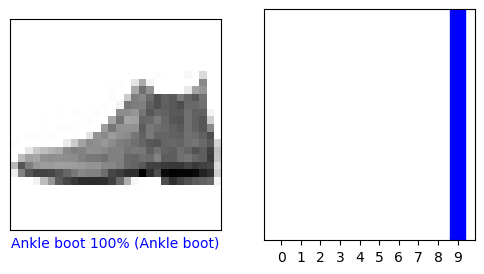

In [46]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

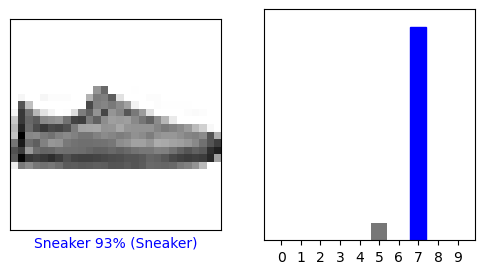

In [47]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

d) Zróżnicowane testy z wyświetleniem obrazu i predykcji.

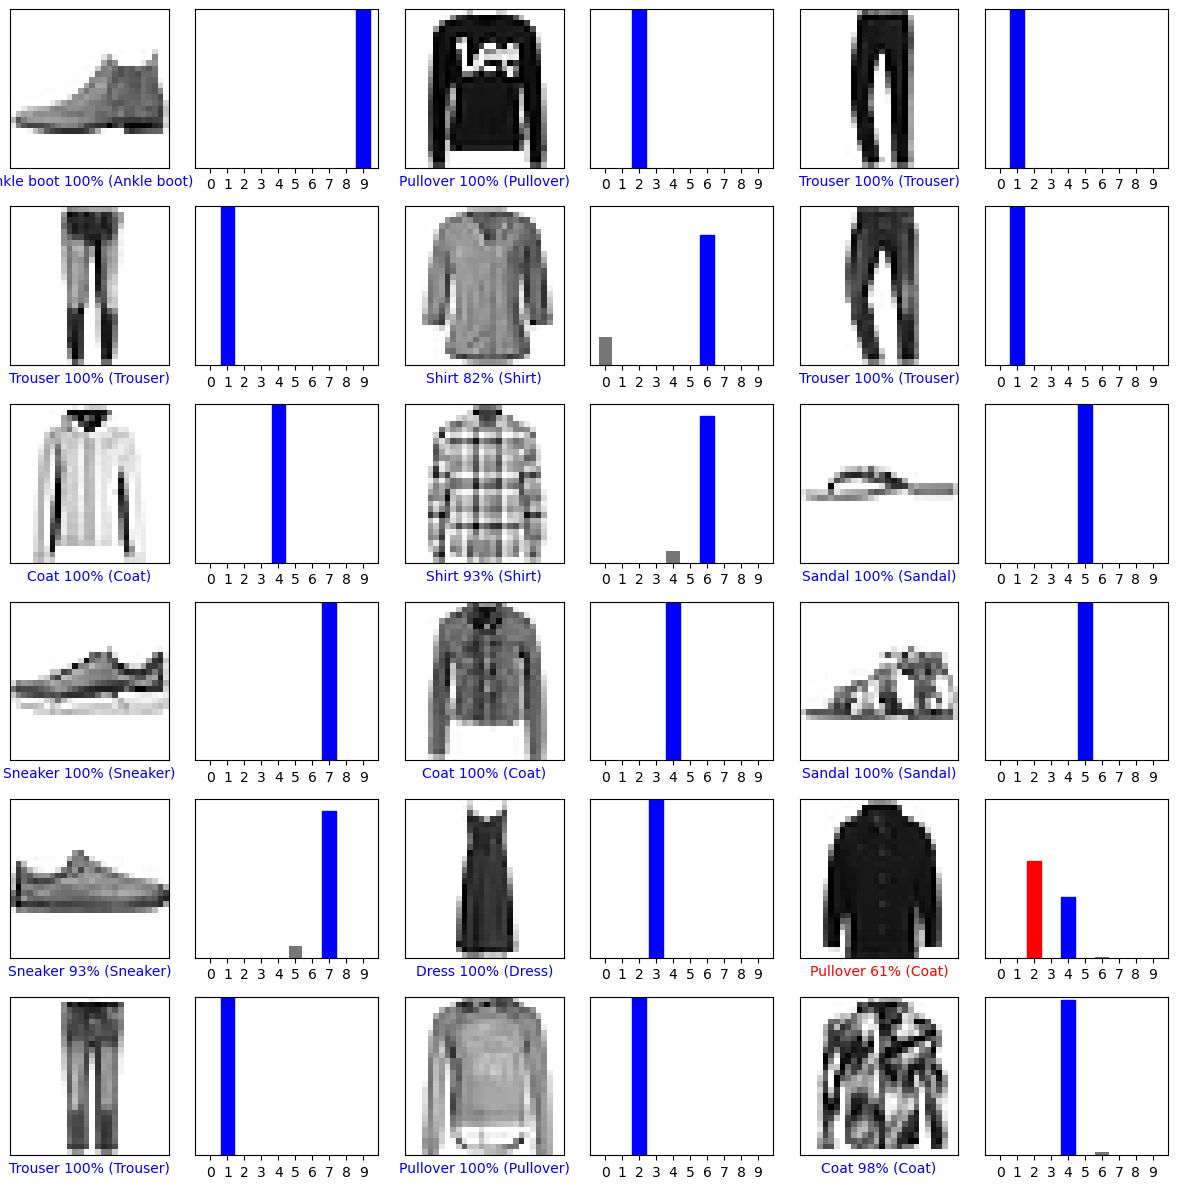

In [49]:
num_rows = 6
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#### 11. Użycie modelu na pojedynczym obrazie.

(28, 28, 1)


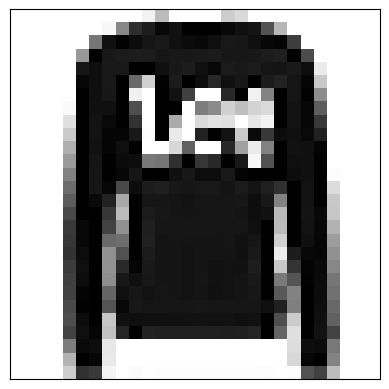

In [51]:
img = test_images[1]

plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(img, cmap=plt.cm.binary)

print(img.shape)

In [52]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


In [53]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 8ms/step
[[1.9574653e-10 4.9898023e-20 9.9999988e-01 2.9311895e-16 8.6691166e-08
  1.9091609e-22 1.7525753e-08 6.4931041e-19 2.7707411e-16 6.8244068e-15]]


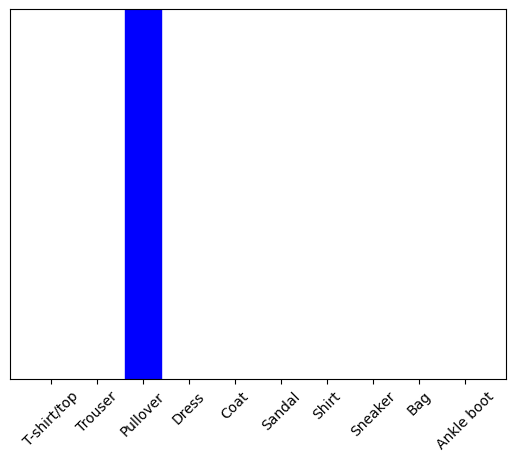

In [54]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [55]:
np.argmax(predictions_single[0])

2

#### 12. Predykcje obrazu zewnętrznego.

Jako dodatkowa funkcja poniższe metody pozwalaja na załaczenie obrazu nie ujętego w zbiorze danych.

Użycie:

```
image_url = "image.url"
predict_image(image_url)
```

In [58]:
def load_image(image_url):
    # Pobranie obrazu
    response = requests.get(image_url, stream=True)
    return Image.open(response.raw)

def process_image(image):
    # Odwrócenie kolorów (negatyw)
    image = ImageOps.invert(image)
    
    # Konwersja do skali szarości i zmiana rozmiaru
    image = image.convert("L")  # "L" oznacza grayscale
    image = image.resize((28, 28))
    
    # Konwersja do numpy array i normalizacja
    image_array = np.array(image) / 255.0
    
    # Dodanie wymiarów dla modelu
    image_array = image_array.reshape(1, 28, 28, 1)
    
    # Wyświetlenie przetworzonego obrazu
    plt.imshow(image_array.reshape(28, 28), cmap=plt.cm.binary)
    plt.title("Przetworzony obraz")
    plt.show()

    return image_array

def predict_image(image_url):
    img_raw = load_image(image_url)
    image_array = process_image(img_raw)
    
    # Predykcja
    prediction = model.predict(image_array)

    plot_value_array(1, prediction[0], test_labels)
    _ = plt.xticks(range(10), class_names, rotation=45)
    plt.show()
    
    # Znalezienie klasy z najwyższym prawdopodobieństwem
    predicted_class = np.argmax(prediction)

    # Najwyższe prawdopodobieństwo
    probability = np.max(prediction) * 100
    
    print(f"Model przewidział: {class_names[predicted_class]} ({probability:.2f}%)")

In [59]:
image_url = "https://tinyurl.com/2kfp4259"

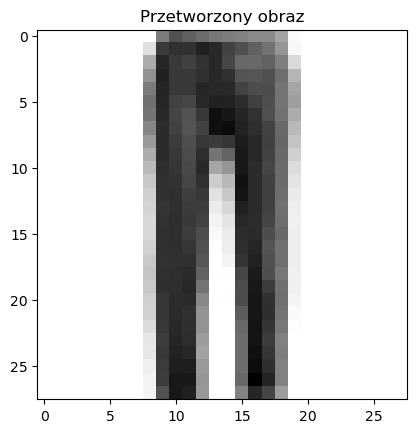

1/1 [==============================] - 0s 7ms/step


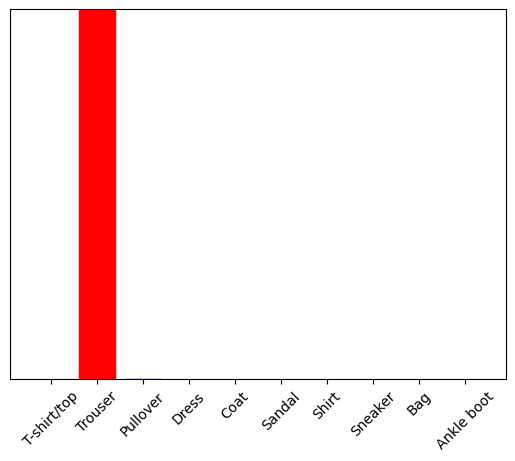

Model przewidział: Trouser (100.00%)


In [60]:
predict_image(image_url)

In [61]:
image_url_2 = "https://tinyurl.com/2y5hwm4f"

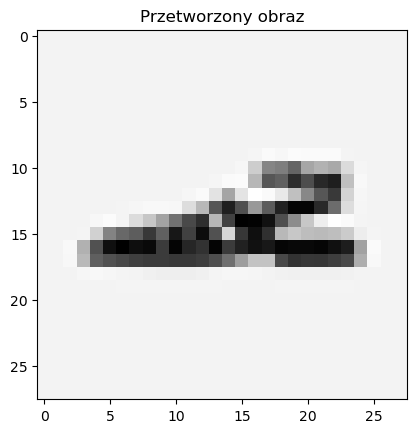

1/1 [==============================] - 0s 7ms/step


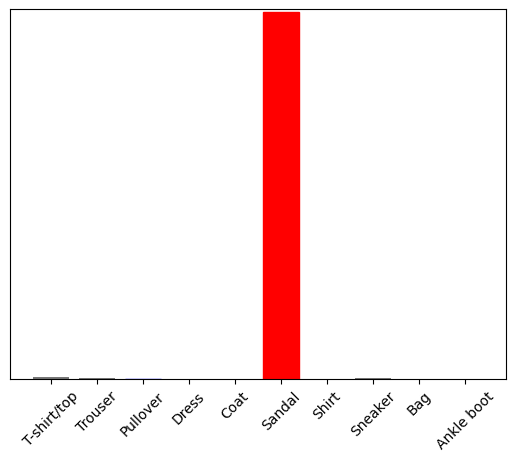

Model przewidział: Sandal (99.24%)


In [62]:
predict_image(image_url_2)